In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../5.1 DATA/Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
71,24,27000,0
357,41,72000,0
25,47,20000,1
246,35,50000,0
269,40,61000,0


### Train Test Split

In [5]:
# Before Normalization it is recommended to train,test,split the data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((280, 2), (120, 2))

### StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)
# Here fit means to calculate mean and standard deviation

StandardScaler()

In [8]:
# We only learns from training data but we transform both test and train

In [9]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
# As we input standardscaler with a dataframe but it returns an array
# so we convert that array back to dataframe

In [12]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [13]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
# Befor transformation the mean is 37.9 and std is 10.2 for age column

In [16]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [17]:
# After transformation the mean is 0 and std is 1 for age column

### Effect of scaling

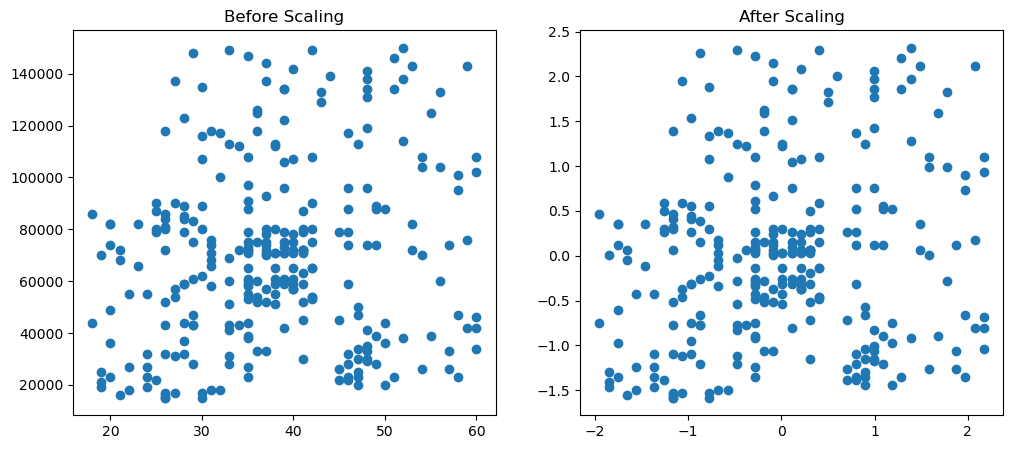

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()

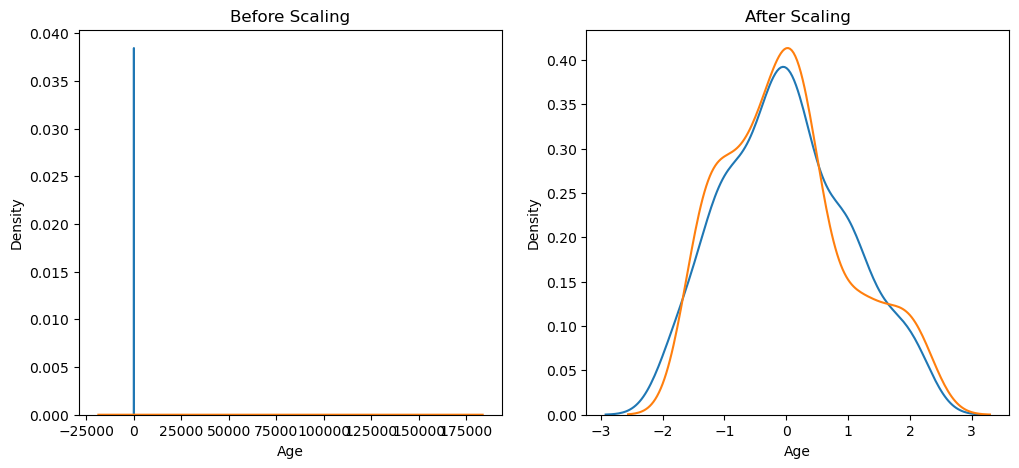

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [20]:
# Since both values are in different scale, they are not comparabele in graph 1 as you can see
# And after standardization as you can see in graph 2 , now it becom comparable

### Comparison of Distributions

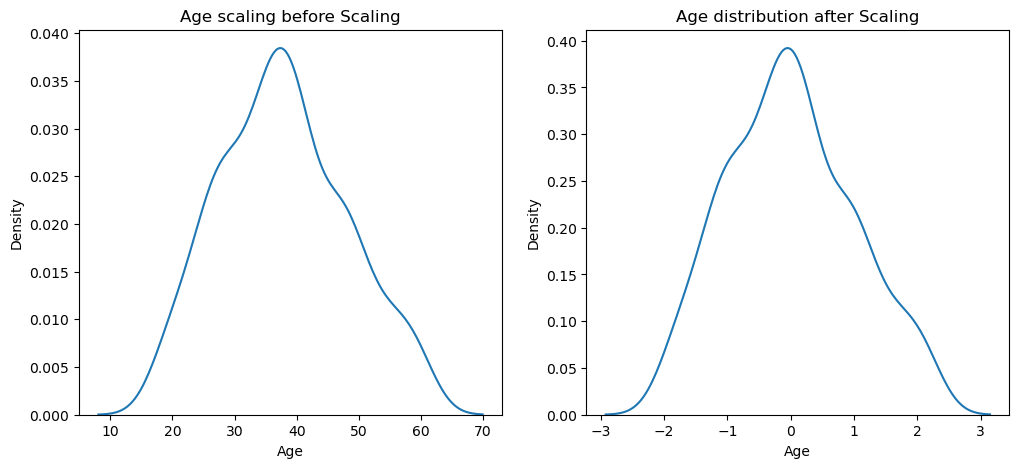

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Age scaling before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)

# After Scaling
ax2.set_title("Age distribution after Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()

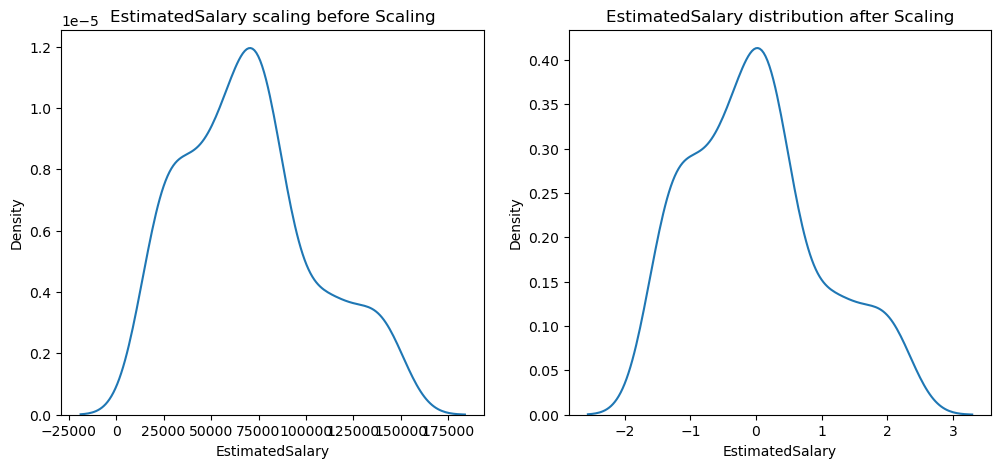

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("EstimatedSalary scaling before Scaling")
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# After Scaling
ax2.set_title("EstimatedSalary distribution after Scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

### Why scaling is important?

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print("Befor Scaling Data :",accuracy_score(y_test,y_pred))
print("After Scaling Data :",accuracy_score(y_test,y_pred_scaled))

Befor Scaling Data : 0.875
After Scaling Data : 0.8666666666666667


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [31]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [33]:
print("Befor Scaling Data :",accuracy_score(y_test,y_pred))
print("After Scaling Data :",accuracy_score(y_test,y_pred_scaled))

Befor Scaling Data : 0.875
After Scaling Data : 0.8666666666666667


In [34]:
# NO effect of standardization on decision tree

In [35]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of outlier

In [36]:
# Here from describe above we can see max and min value , so lets add some outliers to see their impact

In [37]:
df = pd.concat([df,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)

In [38]:
df.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,350000,1


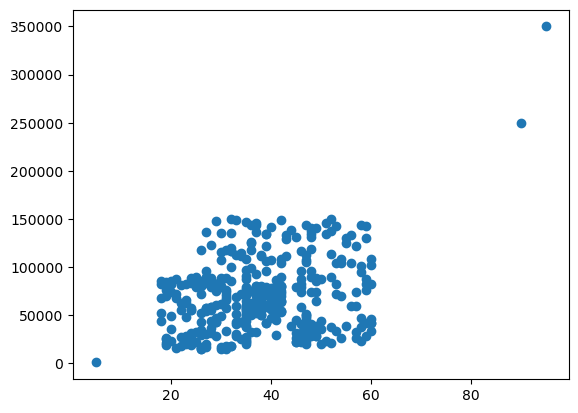

In [39]:
plt.scatter(x=df['Age'],y=df['EstimatedSalary'])

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((282, 2), (121, 2))

In [41]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [42]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
scaler.mean_

array([3.81489362e+01, 6.91382979e+04])

In [44]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [45]:
x_train_scaled

,Age,EstimatedSalary
0,-0.652473,-0.995561
1,1.903047,2.092697
2,-0.104862,1.922701
3,-0.652473,0.562734
4,-0.013593,-0.287245
...,...,...
277,0.899092,-1.108891
278,-0.835010,-0.740567
279,-0.196130,-0.485573
280,-1.017547,-0.428908


In [46]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,38.1,69138.3
std,11.0,35357.7
min,5.0,1000.0
25%,30.0,43000.0
50%,37.0,68000.0
75%,46.0,86750.0
max,90.0,250000.0


In [47]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-1.9
25%,-0.7,-0.7
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,5.1


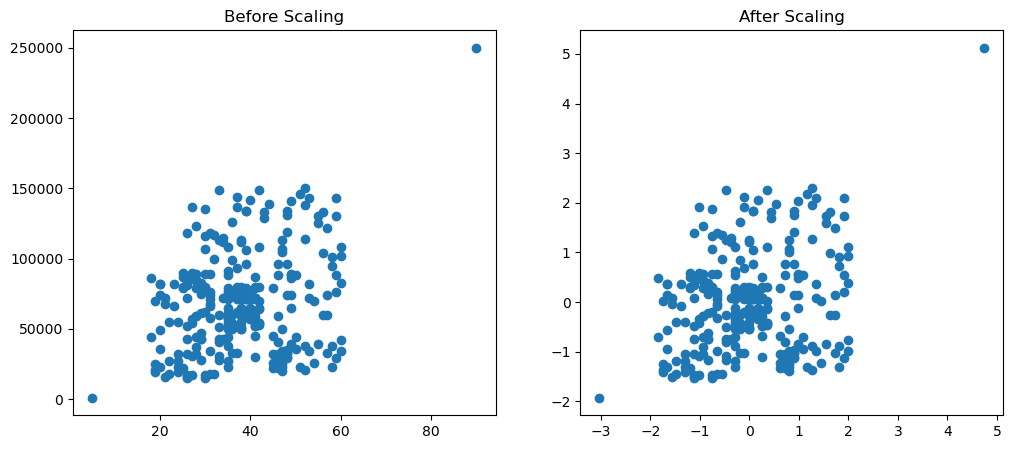

In [48]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
plt.show()

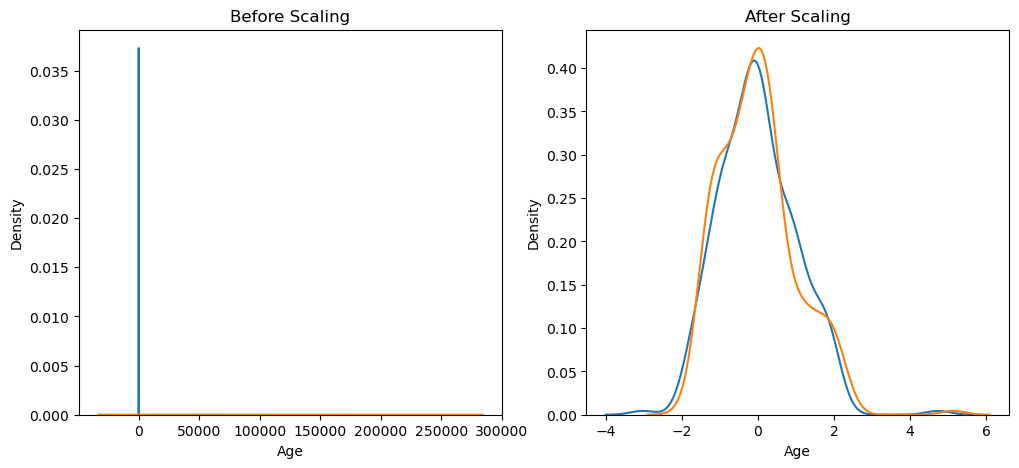

In [49]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()